<h1> Impacts of the 2015 Nepal Earthquake

On April 25, 2015 an earthquake with a magnitude of 7.8 struck Nepal. The earthquake killed nearly 9,000 people and injured nearly 22,000. 

The datasets used in this Notebook contain the responses of the community perceptions survey carried out by the Mobile Helpdesks in Nepal - led by Accountability Lab and Local Interventions Group as part of the Inter-Agency Common Feedback Project. The survey includes information on the biggest problems and concerns and the general satisfaction towards the Government and NGOs in relation to the earthquake response. <sup>1</sup>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2> Load the Datasets </h2>

In [2]:
df1 = pd.read_excel('community-perceptions-in-earthquake-affected-nepal-round-3-1.xlsx', 
                   sheet_name='uploaded_form_g54cmb')
df2 = pd.read_excel('community-perceptions-in-earthquake-affected-nepal-round-2-1.xlsx', 
                    sheet_name='CPS Round 2 - Final (3)')

In [3]:
df1.shape

(1400, 64)

In [4]:
df2.shape

(1398, 75)

In [5]:
df = pd.concat([df1, df2], join='inner', ignore_index=True)

In [6]:
df.head()

,Name_of_interviewer,Agency,Date,Record_Location,_Record_Location_latitude,_Record_Location_longitude,_Record_Location_altitude,_Record_Location_precision,District,VDC_Municipality,...,_9_Main_problems_women,_9a_Top_problem_women,_9a_If_other_top_problem_women,_9b_Second_problem_women,_9b_If_other_second_problem_wom,meta/instanceID,_uuid,_submission_time,_tags,_notes
0,Suruchi Pant,accountability,2015-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,Kathmandu,Satungal,...,1___not_at_all,long_term_shelter__housing,NaN,livelihoods,NaN,uuid:e729f3e9-0cd8-41e3-8a86-2ef3465b6110,e729f3e9-0cd8-41e3-8a86-2ef3465b6110,2015-09-30T12:25:57,NaN,NaN
1,Suruchi Pant,accountability,2015-09-26 00:00:00,NaN,NaN,NaN,NaN,NaN,Kathmandu,Satungal,...,NaN,NaN,NaN,NaN,NaN,uuid:c7a0ec0f-2773-4947-8b2b-050eb6b4d659,c7a0ec0f-2773-4947-8b2b-050eb6b4d659,2015-09-30T12:23:55,NaN,NaN
2,Suruchi Pant,accountability,2015-09-26 00:00:00,NaN,NaN,NaN,NaN,NaN,Kathmandu,Satungal,...,NaN,NaN,NaN,NaN,NaN,uuid:f1c63191-cbdb-4e52-ba33-5cf125939c8b,f1c63191-cbdb-4e52-ba33-5cf125939c8b,2015-09-30T12:21:46,NaN,NaN
3,Jharana RaI,accountability,2015-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,Kathmandu,Jhormahankal,...,4___mostly_yes,NaN,NaN,NaN,NaN,uuid:83625573-4b20-4876-b18d-c75789103218,83625573-4b20-4876-b18d-c75789103218,2015-09-30T12:17:23,NaN,NaN
4,Anjal Bhatta,accountability,2015-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,Kathmandu,Jhormahankal,...,4___mostly_yes,NaN,NaN,NaN,NaN,uuid:508a6969-7f7b-4fac-8803-c1993fc410fe,508a6969-7f7b-4fac-8803-c1993fc410fe,2015-09-30T12:15:20,NaN,NaN


In [7]:
df.shape

(2798, 57)

<h2> Cleaning Data </h2>

Drop Columns where 70% of the values are NaN

In [8]:
df = df.loc[:, df.isnull().sum() < 0.7*df.shape[0]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798 entries, 0 to 2797
Data columns (total 33 columns):
Name_of_interviewer                2798 non-null object
Agency                             2798 non-null object
Date                               2798 non-null object
District                           2798 non-null object
VDC_Municipality                   2798 non-null object
Ward_                              2798 non-null int64
Age                                2798 non-null object
Gender                             2798 non-null object
Caste_ethnicity                    2798 non-null object
Occupation                         2798 non-null object
Do_you_have_any_health_problem     2798 non-null object
_1_Are_your_main_problems_bein     2798 non-null object
_1a_What_is_your_biggest_probl     2295 non-null object
_1b_What_is_your_second_biggest    2295 non-null object
_1c_What_is_your_third_biggest_    2295 non-null object
_2_Satisfied_with_gov              2798 non-null objec

<h3> Drop irrelevant columns </h3>

In [9]:
# All data from 2015
(pd.DatetimeIndex(df['Date']).year).unique()

Int64Index([2015], dtype='int64', name='Date')

In [10]:
df.drop(['Name_of_interviewer', 'Agency', 'Date', 'meta/instanceID', '_uuid',\
         '_submission_time'], axis=1, inplace=True)

In [11]:
df.head(5)

,District,VDC_Municipality,Ward_,Age,Gender,Caste_ethnicity,Occupation,Do_you_have_any_health_problem,_1_Are_your_main_problems_bein,_1a_What_is_your_biggest_probl,...,_3b_Second_need_info,_4_Satisfied_with_NGOs,_4a_Top_need_NGOs,_4b_Second_need_NGOs,_5_Is_support_fair,_5a_Top_reason_not_fair,_5b_Second_reason_not_fair,_7_Have_been_heard,_8_Relief_effort_progress,_9_Main_problems_women
0,Kathmandu,Satungal,1,40_54,female,Newar,other,no_difficulty,1___not_at_all,long_term_shelter__housing,...,NaN,4___mostly_yes,NaN,NaN,don_t_know,NaN,NaN,1___not_at_all,don_t_know,1___not_at_all
1,Kathmandu,Satungal,1,55_greater,male,Newar,skilled_worker,no_difficulty,2___very_little,long_term_shelter__housing,...,how_to_get_shelter_materials,2___very_little,building_mater,food_aid,2___very_little,based_on_caste,based_on_polit,2___not_very_m,2___very_little,NaN
2,Kathmandu,Satungal,1,55_greater,male,Newar,skilled_worker,no_difficulty,2___very_little,long_term_shelter__housing,...,how_to_get_shelter_materials,4___mostly_yes,NaN,NaN,2___very_little,based_on_caste,based_on_polit,1___not_at_all,1___not_at_all,NaN
3,Kathmandu,Jhormahankal,2,15_24,female,Tamang,other,yes__some_diff,3___neutral,long_term_shelter__housing,...,NaN,3___neutral,building_mater,cash_for_work,3___neutral,based_on_dista,first_come__fi,3___neutral,3___neutral,4___mostly_yes
4,Kathmandu,Jhormahankal,2,25_39,female,Tamang,other,no_difficulty,3___neutral,short_term_she,...,how_to_get_shelter_materials,3___neutral,building_mater,cash_for_work,3___neutral,based_on_polit,first_come__fi,3___neutral,2___very_little,4___mostly_yes


In [12]:
df.columns

Index(['District', 'VDC_Municipality', 'Ward_', 'Age', 'Gender',
       'Caste_ethnicity', 'Occupation', 'Do_you_have_any_health_problem',
       '_1_Are_your_main_problems_bein', '_1a_What_is_your_biggest_probl',
       '_1b_What_is_your_second_biggest', '_1c_What_is_your_third_biggest_',
       '_2_Satisfied_with_gov', '_2a_Top_thing_gov', '_2b_Second_thing_gov',
       '_3_Do_you_have_information', '_3a_Top_need_info',
       '_3b_Second_need_info', '_4_Satisfied_with_NGOs', '_4a_Top_need_NGOs',
       '_4b_Second_need_NGOs', '_5_Is_support_fair', '_5a_Top_reason_not_fair',
       '_5b_Second_reason_not_fair', '_7_Have_been_heard',
       '_8_Relief_effort_progress', '_9_Main_problems_women'],
      dtype='object')

<h3> Rename Columns </h3>

In [13]:
df.columns = ['District', 'Municipality', 'Ward','Age', 'Gender', 'Caste', 'Occupation', 
              'Health Problem','Main Problems Met', 'Biggest Problem', 'Second Biggest Problem', 
              'Third Biggest Problem', 'GOV Satisfaction', 'Top Thing Gov', 'Second Thing Gov',
              'Have Information', 'Top Need Info','Second Need Info', 'NGO Satisfaction', 
              'Top Need NGO', 'Second Need NGO', 'Support Fair','Top Reason Not Fair', 
              'Second Reason Not Fair', 'Heard','Relief Effort Progress', 'Main Women Problem']

<h3> Municipality </h3>

In [14]:
df['Municipality'].nunique()

269

In [15]:
df['Municipality'].unique()

array(['Satungal', 'Jhormahankal', 'Sitapaila', 'Dharmasthali',
       'Bajrayogini', 'Ghusel', 'Hetauda Submetropolitan City',
       'changunarayan', 'Bhorle', 'Changunarayan', 'Gairi Bisauna Deupur',
       'Dhaibung', 'Jibanpur', 'Makha', 'Jhaukhel', 'Thakre', 'Pangretar',
       'Dandagaun', 'Jalkanya', 'Ratanchaura', 'chhaling', 'Phulpindada',
       'Nibuwatar', 'Manthali', 'kushadevi', 'Goljung', 'Pipaldada',
       'salyantar', 'kashigaun', 'Bhuwaneswari', 'Salyantar', 'Hanspur',
       'Tilpung', 'sundawati', 'melung', 'Manahari', 'Khadga Bhanjyang',
       'Salyankot', 'Saramthali', 'bhaktpur', 'Ambhanjyang',
       'Chandeni Mandan', 'Prithivi Narayan NP', 'panchkhal', 'Goldhunga',
       'Gotikhel', 'Manikhel', 'lamidada', 'Khalte', 'changunaran',
       'susmachhemawati', 'Phulasi', 'Tupche', 'Thulosiruwari',
       'Kamalamai', 'Barpak', 'Bhimeswor', 'Bhimeshwor', 'Manbu',
       'BHorle', 'Kamalmai', 'Tasarpur', 'Chhatiwan', 'Chilime', 'ryale',
       'Chhatredurali', '

In [16]:
# Capitalize first letter, small else
df['Municipality'] = df['Municipality'].apply(lambda x: x.title())

In [17]:
df['Municipality'].nunique()

189

In [18]:
df['Municipality'].value_counts().to_frame()

,Municipality
Chhaling,40
Phulpindada,40
Panchkhal,40
Jhaukhel,40
Barpak,40
...,...
Papaldada,1
Ratanchaura,1
Khadha Bhanjyang,1
Matatritha,1


Too many different values for Municipality. May do some reduction later.

In [19]:
df.drop(['Municipality', 'Ward'], axis=1, inplace=True)

In [20]:
df.head()

,District,Age,Gender,Caste,Occupation,Health Problem,Main Problems Met,Biggest Problem,Second Biggest Problem,Third Biggest Problem,...,Second Need Info,NGO Satisfaction,Top Need NGO,Second Need NGO,Support Fair,Top Reason Not Fair,Second Reason Not Fair,Heard,Relief Effort Progress,Main Women Problem
0,Kathmandu,40_54,female,Newar,other,no_difficulty,1___not_at_all,long_term_shelter__housing,financial_support,livelihoods,...,NaN,4___mostly_yes,NaN,NaN,don_t_know,NaN,NaN,1___not_at_all,don_t_know,1___not_at_all
1,Kathmandu,55_greater,male,Newar,skilled_worker,no_difficulty,2___very_little,long_term_shelter__housing,financial_support,livelihoods,...,how_to_get_shelter_materials,2___very_little,building_mater,food_aid,2___very_little,based_on_caste,based_on_polit,2___not_very_m,2___very_little,NaN
2,Kathmandu,55_greater,male,Newar,skilled_worker,no_difficulty,2___very_little,long_term_shelter__housing,financial_support,livelihoods,...,how_to_get_shelter_materials,4___mostly_yes,NaN,NaN,2___very_little,based_on_caste,based_on_polit,1___not_at_all,1___not_at_all,NaN
3,Kathmandu,15_24,female,Tamang,other,yes__some_diff,3___neutral,long_term_shelter__housing,education,financial_support,...,NaN,3___neutral,building_mater,cash_for_work,3___neutral,based_on_dista,first_come__fi,3___neutral,3___neutral,4___mostly_yes
4,Kathmandu,25_39,female,Tamang,other,no_difficulty,3___neutral,short_term_she,long_term_shelter__housing,financial_support,...,how_to_get_shelter_materials,3___neutral,building_mater,cash_for_work,3___neutral,based_on_polit,first_come__fi,3___neutral,2___very_little,4___mostly_yes


<h2> Data Visualization </h2>

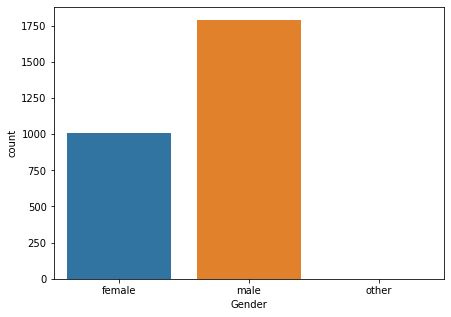

In [21]:
plt.figure(figsize=(7,5))
sns.countplot(x='Gender', data=df)

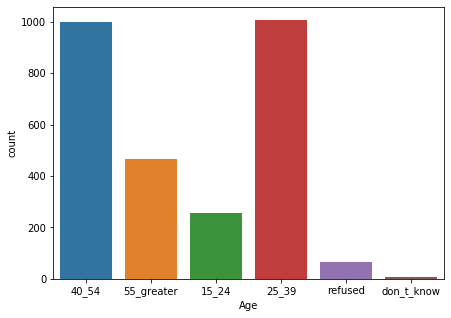

In [22]:
plt.figure(figsize=(7,5))
sns.countplot(x='Age', data=df)

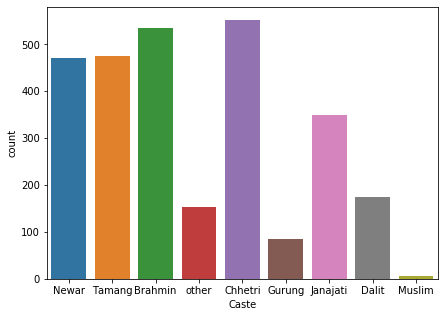

In [23]:
plt.figure(figsize=(7,5))
sns.countplot(x='Caste', data=df)

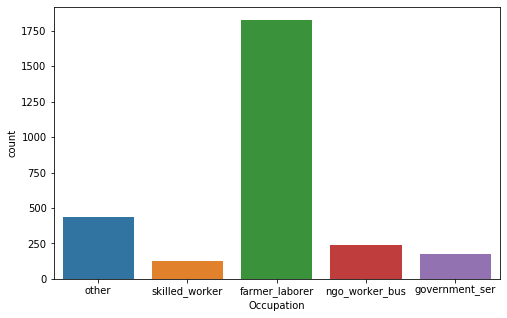

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(x='Occupation', data=df)

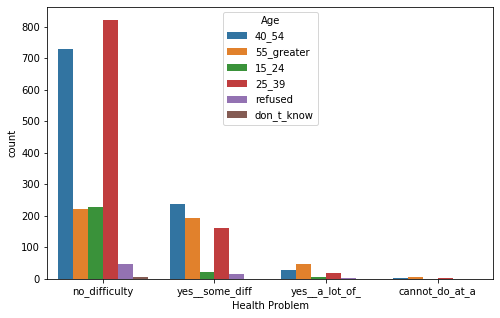

In [54]:
plt.figure(figsize=(8,5))
sns.countplot(x='Health Problem', data=df, hue='Age')

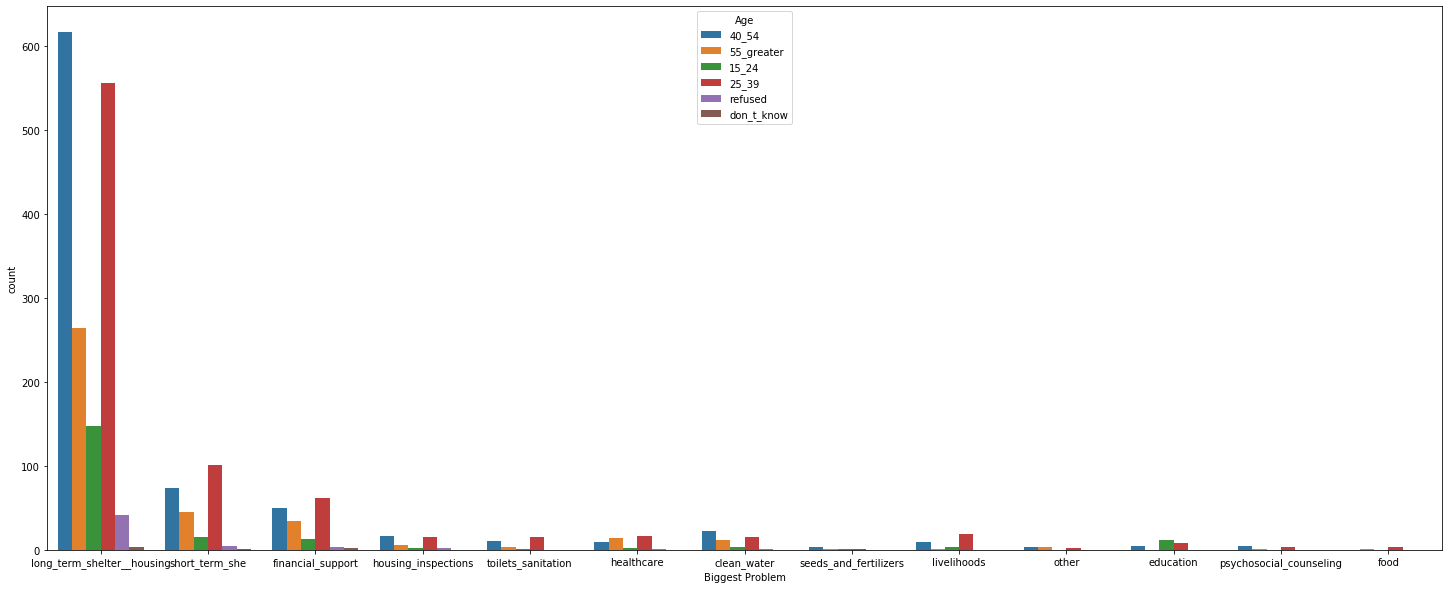

In [26]:
plt.figure(figsize=(25,10))
sns.countplot(x='Biggest Problem', data=df, hue='Age')

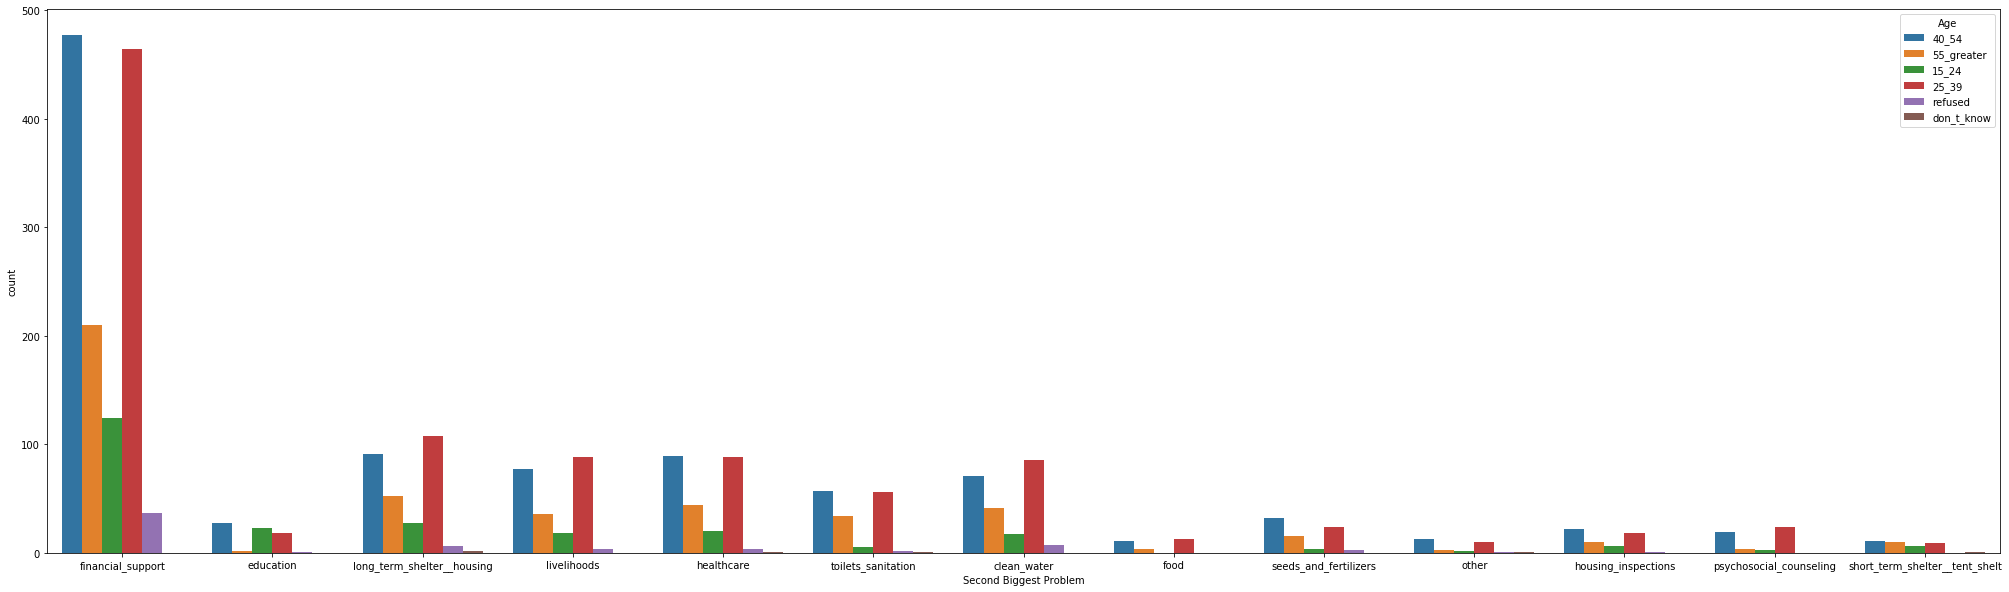

In [59]:
plt.figure(figsize=(35,10))
sns.countplot(x='Second Biggest Problem', data=df, hue='Age')

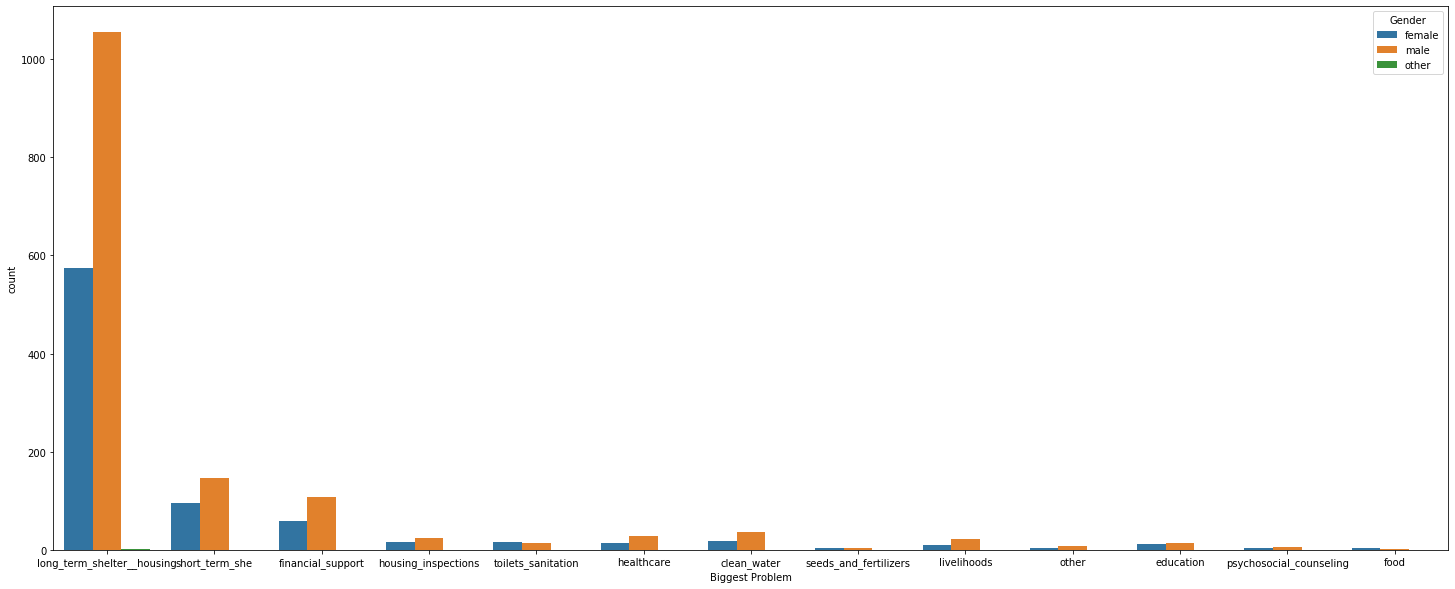

In [27]:
plt.figure(figsize=(25,10))
sns.countplot(x='Biggest Problem', data=df, hue='Gender')

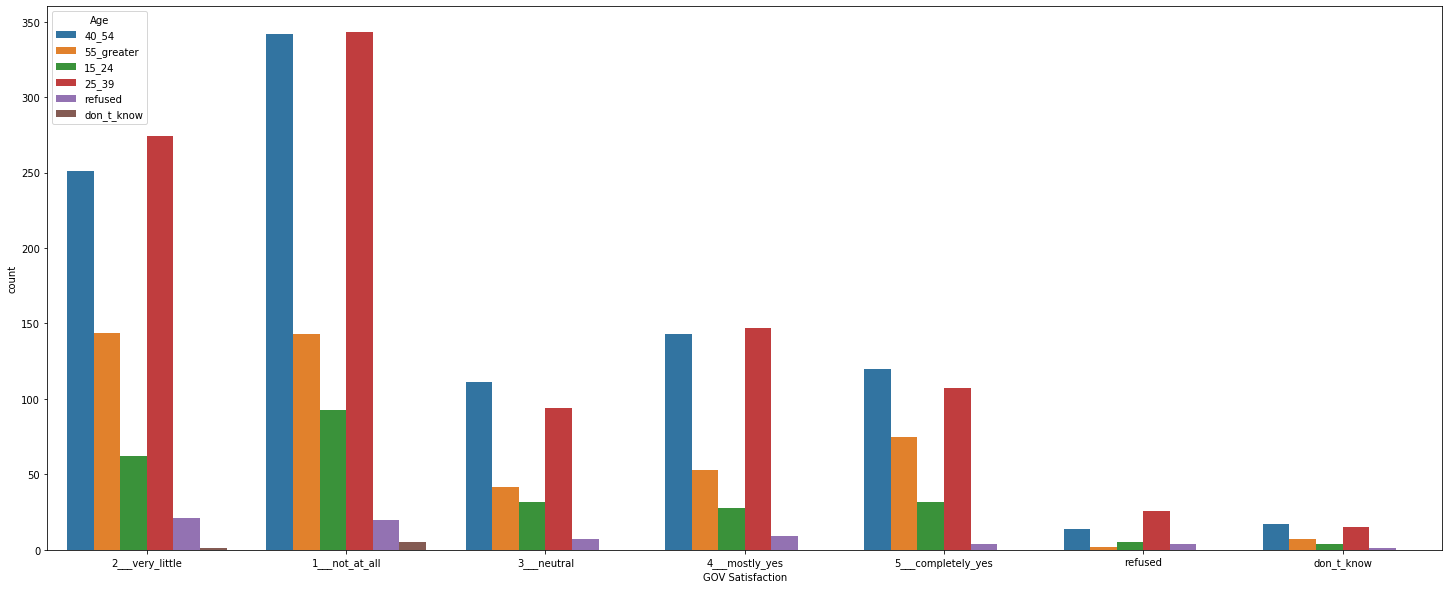

In [28]:
plt.figure(figsize=(25,10))
sns.countplot(x='GOV Satisfaction', data=df, hue='Age')

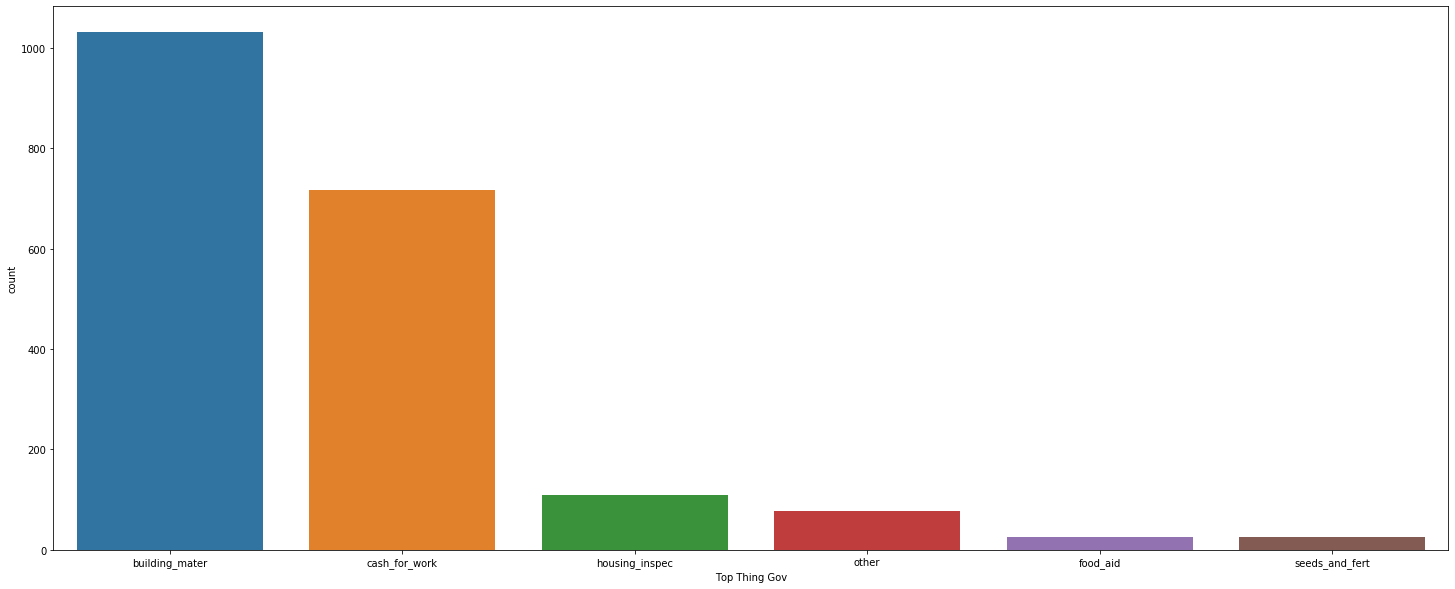

In [29]:
plt.figure(figsize=(25,10))
sns.countplot(x='Top Thing Gov', data=df)

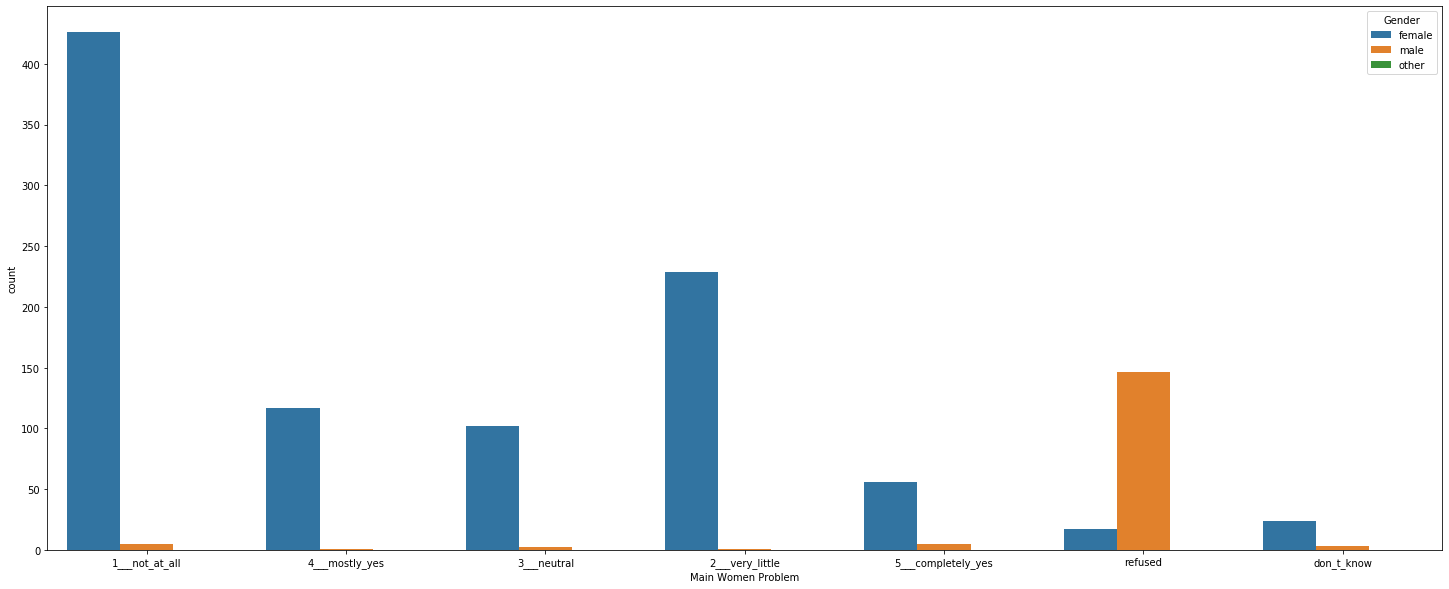

In [30]:
plt.figure(figsize=(25,10))
sns.countplot(x='Main Women Problem', data=df, hue='Gender')

<h2> Null Values </h2>

In [31]:
df['Gender'].value_counts()

male      1790
female    1006
other        2
Name: Gender, dtype: int64

In [32]:
df['Main Women Problem'].count()

1134

In [33]:
len(df[(df['Main Women Problem'].notnull()) & (df['Gender']=='female')])

971

In [34]:
len(df[(df['Main Women Problem'].notnull()) & (df['Gender']=='female')])/df['Main Women Problem'].count()

0.8562610229276896

More than 85% of the non-null responses of Main Women Problem are answered by Females. 

In [35]:
df.drop(['Main Women Problem'], axis=1, inplace=True)

In [36]:
df.isna().sum()

District                     0
Age                          0
Gender                       0
Caste                        0
Occupation                   0
Health Problem               0
Main Problems Met            0
Biggest Problem            503
Second Biggest Problem     503
Third Biggest Problem      503
GOV Satisfaction             0
Top Thing Gov              813
Second Thing Gov           813
Have Information             0
Top Need Info             1050
Second Need Info          1050
NGO Satisfaction             0
Top Need NGO              1189
Second Need NGO           1189
Support Fair                 0
Top Reason Not Fair       1321
Second Reason Not Fair    1321
Heard                        0
Relief Effort Progress       0
dtype: int64

Fill in null values with the most common value in the respective columns

In [37]:
columns_with_null = [col for col in df.columns if df[col].isnull().any()]

for col in columns_with_null:
    df[col].fillna(df[col].value_counts().index[0], inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798 entries, 0 to 2797
Data columns (total 24 columns):
District                  2798 non-null object
Age                       2798 non-null object
Gender                    2798 non-null object
Caste                     2798 non-null object
Occupation                2798 non-null object
Health Problem            2798 non-null object
Main Problems Met         2798 non-null object
Biggest Problem           2798 non-null object
Second Biggest Problem    2798 non-null object
Third Biggest Problem     2798 non-null object
GOV Satisfaction          2798 non-null object
Top Thing Gov             2798 non-null object
Second Thing Gov          2798 non-null object
Have Information          2798 non-null object
Top Need Info             2798 non-null object
Second Need Info          2798 non-null object
NGO Satisfaction          2798 non-null object
Top Need NGO              2798 non-null object
Second Need NGO           2798 non-null object


<h2> Cluster Analysis </h2>

<h3> One Hot Encoding </h3>

In [39]:
one_hot_encoded_df = pd.DataFrame()

for col in df.columns:
    one_hot_encoded_df = pd.concat([one_hot_encoded_df, pd.get_dummies(df[col])], axis=1)

In [40]:
one_hot_encoded_df.head()

,Bhaktapur,Dhading,Dolakha,Gorkha,Kathmandu,Kavrepalanchok,Lalitpur,Makwanpur,Nuwakot,Okhaldhunga,...,5___completely,don_t_know,refused,1___not_at_all,2___very_little,3___neutral,4___mostly_yes,5___completely_yes,don_t_know,refused
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [41]:
from sklearn.cluster import KMeans

<h3> Elbow Method </h3>

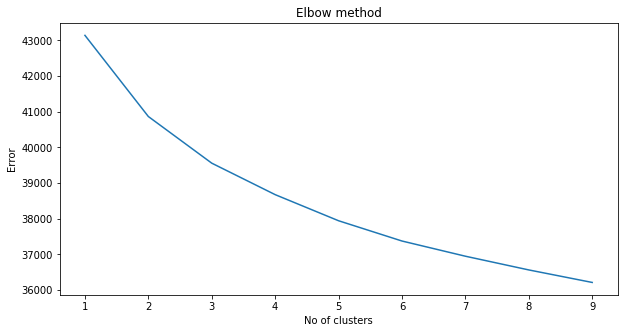

In [42]:
Error =[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i).fit(one_hot_encoded_df)
    kmeans.fit(one_hot_encoded_df)
    Error.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187

No clear elbow like shaped formed, therefore try another method.

<h3> Silhouette Method </h3>

In [43]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(one_hot_encoded_df)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(one_hot_encoded_df, labels, metric = 'euclidean')
    print("For {} clusters, the average silhouette score is {}".format(k, silhouette_avg))
    sil.append(silhouette_avg)

For 2 clusters, the average silhouette score is 0.049115293225770094
For 3 clusters, the average silhouette score is 0.04078997435666134
For 4 clusters, the average silhouette score is 0.03970184872789039
For 5 clusters, the average silhouette score is 0.03324661207304878
For 6 clusters, the average silhouette score is 0.033038696763392196
For 7 clusters, the average silhouette score is 0.029386706609769588
For 8 clusters, the average silhouette score is 0.03481579418567962
For 9 clusters, the average silhouette score is 0.024885188659276965
For 10 clusters, the average silhouette score is 0.023838498613048074


Two clusters has the highest silhouette score, therefore use two as n_clusters

In [44]:
kmeans = KMeans(n_clusters=2)

In [45]:
kmeans.fit(one_hot_encoded_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
kmeans.labels_

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [47]:
y_kmeans = kmeans.predict(one_hot_encoded_df)
y_kmeans

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [48]:
one_hot_encoded_df['Cluster'] = y_kmeans
df['Cluster'] = y_kmeans

In [49]:
df.head()

,District,Age,Gender,Caste,Occupation,Health Problem,Main Problems Met,Biggest Problem,Second Biggest Problem,Third Biggest Problem,...,Second Need Info,NGO Satisfaction,Top Need NGO,Second Need NGO,Support Fair,Top Reason Not Fair,Second Reason Not Fair,Heard,Relief Effort Progress,Cluster
0,Kathmandu,40_54,female,Newar,other,no_difficulty,1___not_at_all,long_term_shelter__housing,financial_support,livelihoods,...,how_to_get_shelter_materials,4___mostly_yes,building_mater,cash_for_work,don_t_know,based_on_polit,based_on_polit,1___not_at_all,don_t_know,1
1,Kathmandu,55_greater,male,Newar,skilled_worker,no_difficulty,2___very_little,long_term_shelter__housing,financial_support,livelihoods,...,how_to_get_shelter_materials,2___very_little,building_mater,food_aid,2___very_little,based_on_caste,based_on_polit,2___not_very_m,2___very_little,0
2,Kathmandu,55_greater,male,Newar,skilled_worker,no_difficulty,2___very_little,long_term_shelter__housing,financial_support,livelihoods,...,how_to_get_shelter_materials,4___mostly_yes,building_mater,cash_for_work,2___very_little,based_on_caste,based_on_polit,1___not_at_all,1___not_at_all,1
3,Kathmandu,15_24,female,Tamang,other,yes__some_diff,3___neutral,long_term_shelter__housing,education,financial_support,...,how_to_get_shelter_materials,3___neutral,building_mater,cash_for_work,3___neutral,based_on_dista,first_come__fi,3___neutral,3___neutral,1
4,Kathmandu,25_39,female,Tamang,other,no_difficulty,3___neutral,short_term_she,long_term_shelter__housing,financial_support,...,how_to_get_shelter_materials,3___neutral,building_mater,cash_for_work,3___neutral,based_on_polit,first_come__fi,3___neutral,2___very_little,1


In [50]:
one_hot_encoded_df.head()

,Bhaktapur,Dhading,Dolakha,Gorkha,Kathmandu,Kavrepalanchok,Lalitpur,Makwanpur,Nuwakot,Okhaldhunga,...,don_t_know,refused,1___not_at_all,2___very_little,3___neutral,4___mostly_yes,5___completely_yes,don_t_know,refused,Cluster
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [51]:
# kmeans.cluster_centers_

<h3> PCA </h3>
<h7> Dimensionality Reduction </h7>

In [52]:
from sklearn.decomposition import PCA

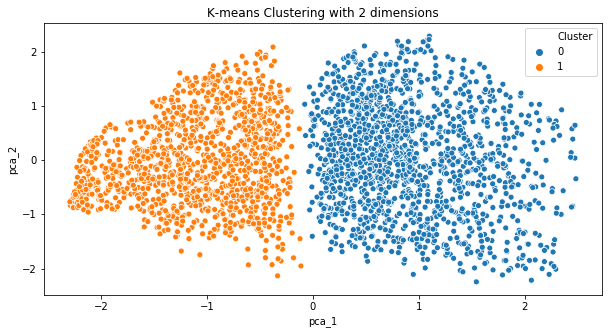

In [53]:
reduced_data = PCA(n_components=2).fit_transform(one_hot_encoded_df)
results = pd.DataFrame(reduced_data,columns=['pca_1','pca_2'])

plt.figure(figsize=(10,5))
sns.scatterplot(x="pca_1", y="pca_2", hue=one_hot_encoded_df['Cluster'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

<h2> References </h2>

1. https://data.humdata.org/dataset/community-perceptions-in-earthquake-affected-nepal